# Logistic Regression with StatsModels

In [28]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import logit

titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


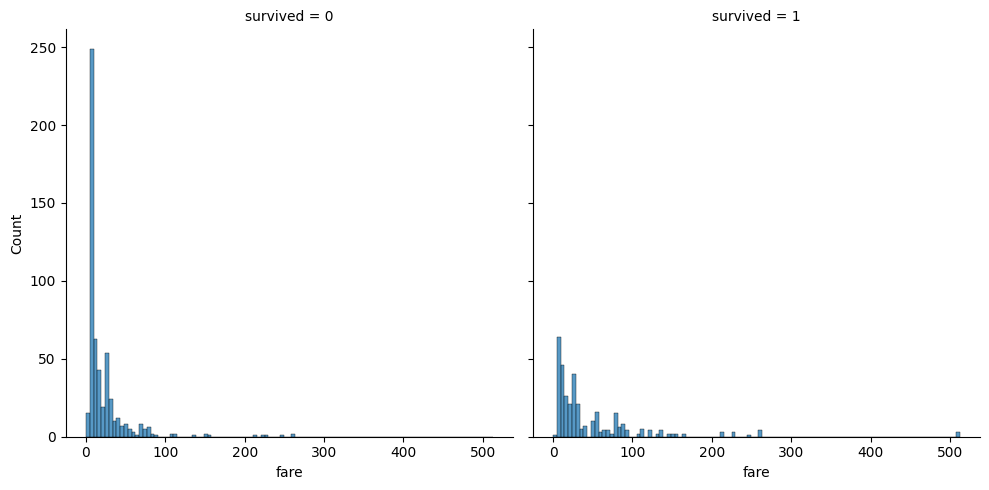

In [35]:
# Create the histograms
sns.displot(data=titanic, x='fare', col='survived')
plt.show()

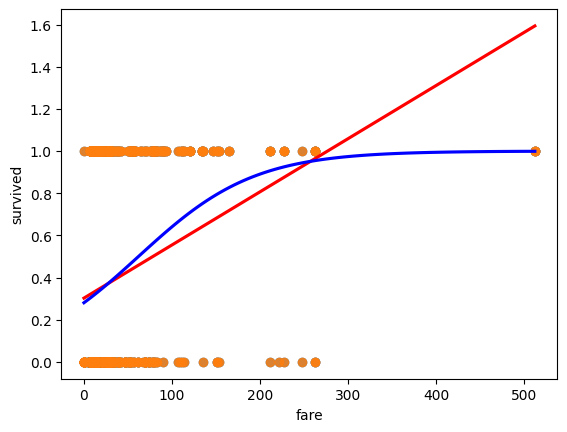

In [36]:
# Draw a linear regression trend line and a scatter plot of fare vs. survived
sns.regplot(data=titanic, x='fare', y='survived', ci=None, line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of fare vs. survived
sns.regplot(x="fare",
            y="survived",
            data=titanic, 
            ci=None,
            logistic=True,
            line_kws={"color": 'blue'})

plt.show()

## Fit Model

In [37]:
# Fit a logistic regression model
mdl_survived_vs_fare = logit('survived ~ fare', titanic).fit() # label on left side and feature on right side
print(mdl_survived_vs_fare.params) # Print the parameters

Optimization terminated successfully.
         Current function value: 0.627143
         Iterations 6
Intercept   -0.941330
fare         0.015197
dtype: float64


## make predictions

In [40]:
feature_data_for_prediction = pd.DataFrame({'fare': [10,200,300,50,20.222, 137]})

prediction_data = feature_data_for_prediction.assign(
    is_survived = mdl_survived_vs_fare.predict(feature_data_for_prediction) # values in percentage. i.e; How much chance to survive
)

## Plot Logistic trend line from original dataset vs predicted values

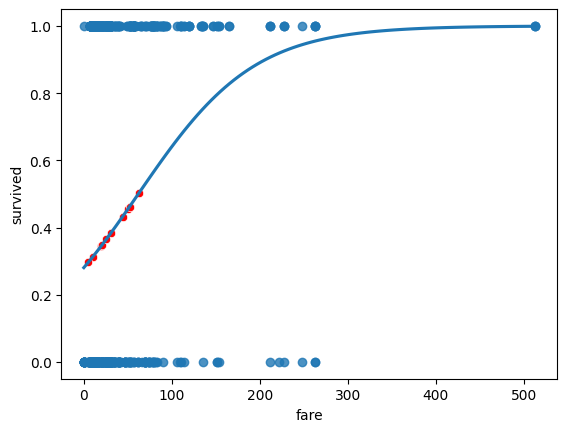

In [39]:
fig = plt.figure()

# Create a scatter plot with logistic trend line of original dataset
sns.regplot(x="fare",
            y="survived",
            data=titanic, 
            ci=None,
            logistic=True,
            )

# Overlay with prediction_data, colored red
sns.scatterplot(x="fare", y="is_survived", 
            data=prediction_data, color='red')

plt.show()

## Plot predicted values, either if he/she survived or not

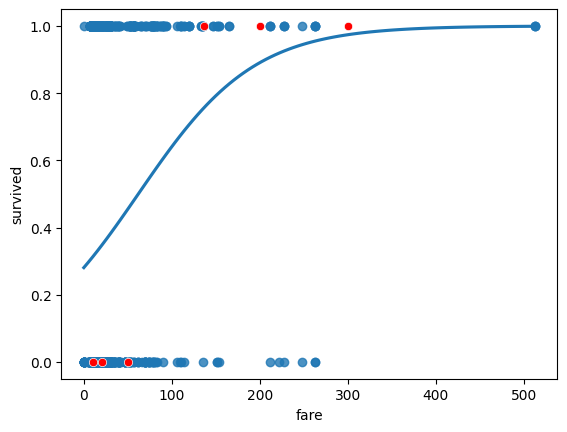

In [42]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["is_survived"])

fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="fare",
            y="survived",
            data=titanic,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="fare", y="most_likely_outcome", 
            data=prediction_data, color='red')

plt.show()

## Print and draw confusion matrix

[[511.  38.]
 [260.  82.]]


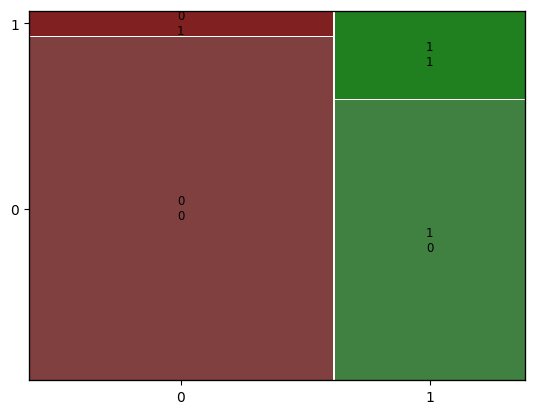

In [43]:
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_survived_vs_fare.pred_table()
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

## Accuracy, Sensitivity, Specificity

Accurray --> how many values are correctly predicted. either if TP or TN
Sensitivity --> How many TP values are correctly predicted. divide TP with total actual positive values.
Specificity --> How many TN values are correctly predicted. divide TN with total actual negative values.

In [44]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0, 0]
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
FP = conf_matrix[0, 1]

# Calculate and print the accuracy
accuracy = (TN+TP) / (TN+TP+FN+FP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (TP+FN)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN+FP)
print("specificity: ", specificity)

accuracy:  0.6655443322109988
sensitivity:  0.23976608187134502
specificity:  0.930783242258652
